In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset with semicolon delimiter
file_path = '/content/sample_data/pde.csv'  # Replace with your file path
df = pd.read_csv(file_path, delimiter=';')

# Strip any leading or trailing spaces from the column names
df.columns = df.columns.str.strip()

# Print the cleaned column names
print("Cleaned Columns in the dataset:")
print(df.columns)

# Print the first few rows of the dataset to inspect
print("\nFirst few rows of the cleaned dataset:")
print(df.head())

# Group by the class column and sum up each bug type
bugs_per_class = df.groupby('classname').sum().reset_index()[[
    'classname', 'bugs', 'nonTrivialBugs', 'majorBugs', 'criticalBugs', 'highPriorityBugs'
]]

# Calculate the total sum of bugs for each class
bugs_per_class['total_sum_bugs'] = bugs_per_class[['bugs', 'nonTrivialBugs', 'majorBugs',
                                                    'criticalBugs', 'highPriorityBugs']].sum(axis=1)

# Strip spaces from columns in bugs_per_class
bugs_per_class.columns = bugs_per_class.columns.str.strip()

# Ensure classname columns are stripped of spaces
df['classname'] = df['classname'].str.strip()
bugs_per_class['classname'] = bugs_per_class['classname'].str.strip()

# Merge the bug total sums back with the original dataframe
df = df.merge(bugs_per_class[['classname', 'total_sum_bugs']], on='classname', how='left')

# Save the updated dataset back to the same CSV file
df.to_csv(file_path, sep=';', index=False)

# Print the updated dataframe
print("\nUpdated dataset with total_sum_bugs column:")
print(df.head())

# Calculate the median of the new column
median_total_sum_bugs = df['total_sum_bugs'].median()
print(f"\nThe median of the 'total_sum_bugs' column is: {median_total_sum_bugs}")

# Classify classes based on the median
df['fault_classification'] = df['total_sum_bugs'].apply(
    lambda x: 'Most Faulty' if x >= median_total_sum_bugs else 'Least Faulty'
)

# Save the updated dataset back to the same CSV file
df.to_csv(file_path, sep=';', index=False)

print(f"\nThe dataset has been successfully updated with the total_sum_bugs column in {file_path}")



Cleaned Columns in the dataset:
Index(['classname', 'numberOfVersionsUntil:', 'numberOfFixesUntil:',
       'numberOfRefactoringsUntil:', 'numberOfAuthorsUntil:',
       'linesAddedUntil:', 'maxLinesAddedUntil:', 'avgLinesAddedUntil:',
       'linesRemovedUntil:', 'maxLinesRemovedUntil:', 'avgLinesRemovedUntil:',
       'codeChurnUntil:', 'maxCodeChurnUntil:', 'avgCodeChurnUntil:',
       'ageWithRespectTo:', 'weightedAgeWithRespectTo:', 'bugs',
       'nonTrivialBugs', 'majorBugs', 'criticalBugs', 'highPriorityBugs', ''],
      dtype='object')

First few rows of the cleaned dataset:
                                           classname  numberOfVersionsUntil:  \
0  org::eclipse::pde::internal::core::text::toc::...                       5   
1  org::eclipse::pde::internal::ui::editor::Syste...                      10   
2  org::eclipse::pde::internal::ui::editor::cheat...                       2   
3  org::eclipse::pde::internal::ui::editor::outli...                       2   
4  org::e


Calculated Metrics:
                                              classname  CBO  RFC  WMC
0     org::eclipse::pde::internal::core::text::toc::...    2    2    2
1     org::eclipse::pde::internal::ui::editor::Syste...    2    2    2
2     org::eclipse::pde::internal::ui::editor::cheat...    2    2    2
3     org::eclipse::pde::internal::ui::editor::outli...    2    2    2
4     org::eclipse::pde::internal::ui::tests::macro:...    2    2    2
...                                                 ...  ...  ...  ...
1492  org::eclipse::pde::internal::ui::editor::text:...    2    2    2
1493  org::eclipse::pde::internal::core::builders::E...    2    2    2
1494  org::eclipse::pde::internal::core::builders::D...    2    2    2
1495  org::eclipse::pde::internal::ui::templates::id...    2    2    2
1496  org::eclipse::pde::internal::core::plugin::Abb...    2    2    2

[1497 rows x 4 columns]

CBO Metric Statistics:
 count    1497.0
mean        2.0
std         0.0
min         2.0
25%         2

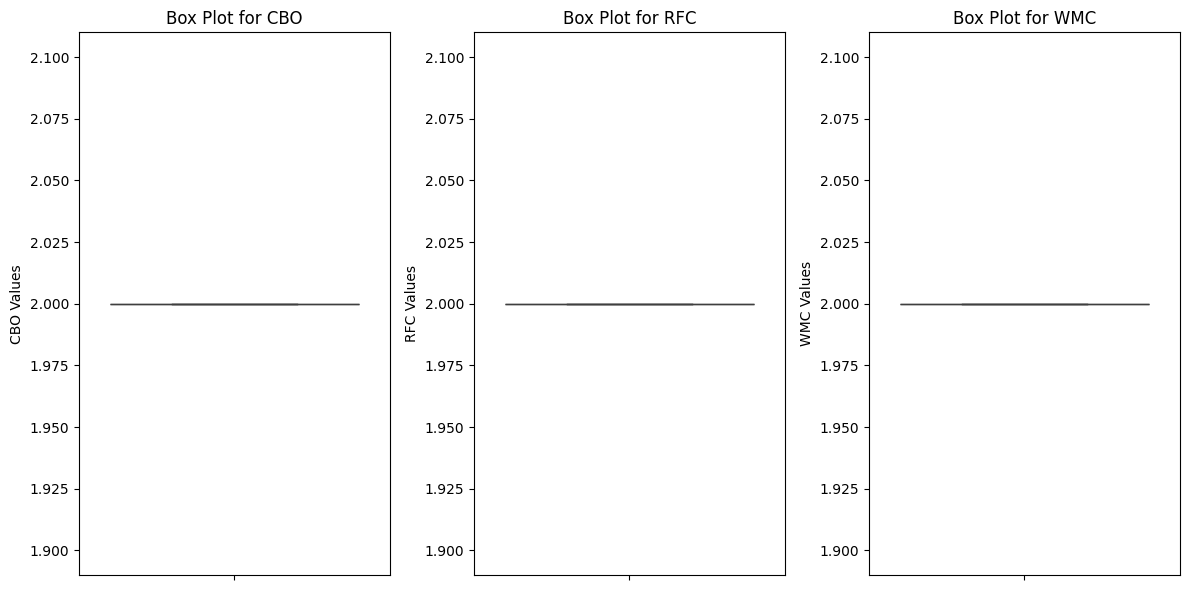

In [4]:
# ----- Additional Code for CBO, RFC, and WMC Calculation -----

# Ensure that the dataset has the necessary columns for coupling and methods information
# Assuming the dataset has columns such as 'methods' and 'coupled_classes'
# In practice, this data would need to be extracted from the source code or another data source
# Here we mock these columns for illustrative purposes:

# Mock columns for demonstration
df['methods'] = df['methods'] if 'methods' in df.columns else [['m1', 'm2']] * len(df)
df['coupled_classes'] = df['coupled_classes'] if 'coupled_classes' in df.columns else [['ClassB', 'ClassC']] * len(df)

# Calculate CBO, RFC, and WMC
df['CBO'] = df['coupled_classes'].apply(len)
df['RFC'] = df['methods'].apply(len)  # Here we assume method calls are self-contained in methods
df['WMC'] = df['methods'].apply(len)  # Assuming each method has equal weight

# Print the calculated metrics
print("\nCalculated Metrics:")
print(df[['classname', 'CBO', 'RFC', 'WMC']])

# Check for variation in the metrics
print("\nCBO Metric Statistics:\n", df['CBO'].describe())
print("\nRFC Metric Statistics:\n", df['RFC'].describe())
print("\nWMC Metric Statistics:\n", df['WMC'].describe())

# Check first few rows to inspect the values
print("\nFirst few rows of the calculated metrics:")
print(df[['classname', 'CBO', 'RFC', 'WMC']].head())

# Plotting separate box plots for CBO, RFC, and WMC
plt.figure(figsize=(12, 6))

# Using seaborn for a nice boxplot
plt.subplot(1, 3, 1)
sns.boxplot(y=df['CBO'])
plt.title("Box Plot for CBO")
plt.ylabel("CBO Values")

plt.subplot(1, 3, 2)
sns.boxplot(y=df['RFC'])
plt.title("Box Plot for RFC")
plt.ylabel("RFC Values")

plt.subplot(1, 3, 3)
sns.boxplot(y=df['WMC'])
plt.title("Box Plot for WMC")
plt.ylabel("WMC Values")

plt.tight_layout()
plt.show()

Transformed Medians:
Transformed CBO Median: 0.19722457733621912
Transformed RFC Median: 0.19722457733621912
Transformed WMC Median: 0.19722457733621912

-2LogL Values (Raw):
CBO: 2074.5551447584066
RFC: 2074.5551447584066
WMC: 2074.5551447584066

-2LogL Values (Transformed):
CBO: 2074.5551447584066
RFC: 2074.5551447584066
WMC: 2074.5551447584066


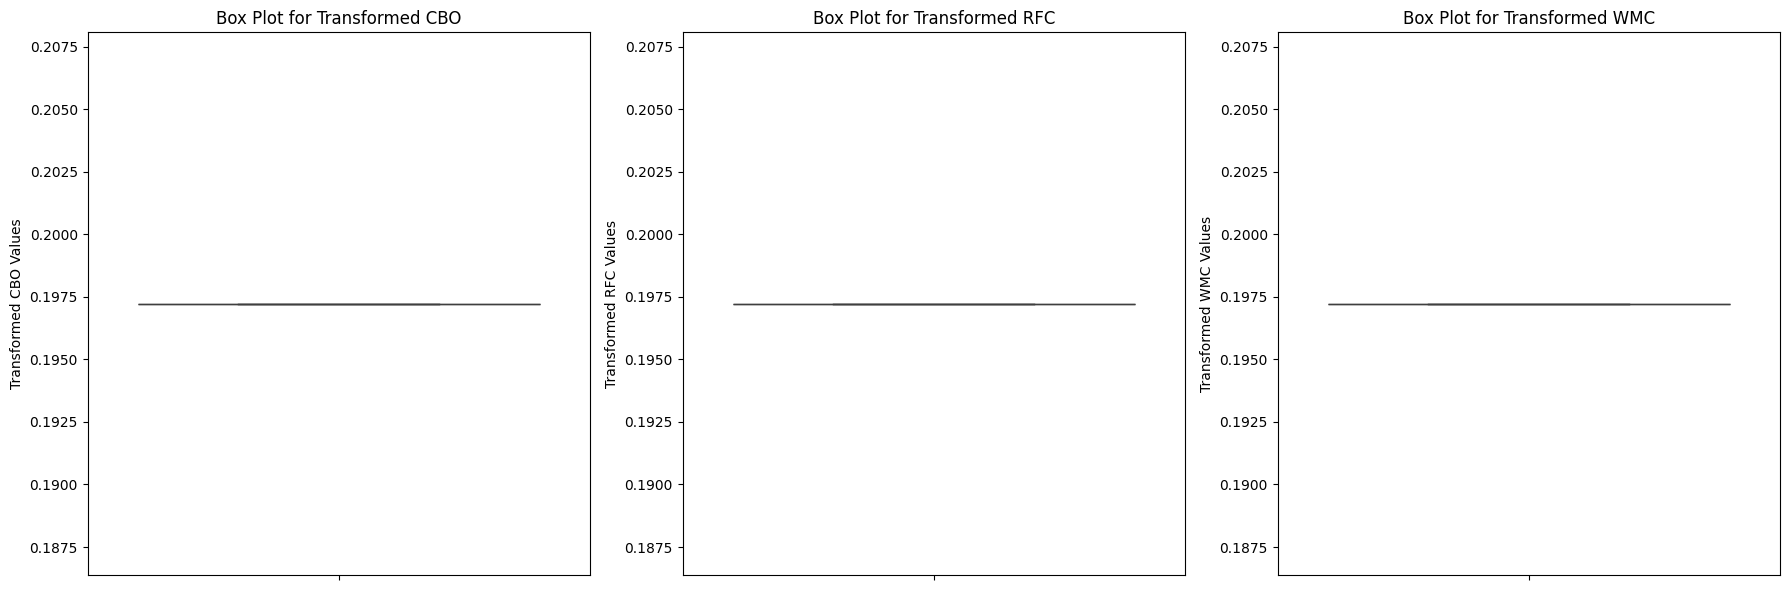

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Load the dataset
file_path = '/content/sample_data/pde.csv'  # Replace with your file path
df = pd.read_csv(file_path, delimiter=';')

# Strip any leading or trailing spaces from the column names
df.columns = df.columns.str.strip()

# Calculate CBO, RFC, and WMC (assuming methods and coupled_classes columns exist)
df['methods'] = df['methods'] if 'methods' in df.columns else [['m1', 'm2']] * len(df)
df['coupled_classes'] = df['coupled_classes'] if 'coupled_classes' in df.columns else [['ClassB', 'ClassC']] * len(df)

df['CBO'] = df['coupled_classes'].apply(len)
df['RFC'] = df['methods'].apply(len)
df['WMC'] = df['methods'].apply(len)

# Calculate medians of the original metrics
median_CBO = df['CBO'].median()
median_RFC = df['RFC'].median()
median_WMC = df['WMC'].median()

# Calculate the log-transformed medians
transformed_CBO = np.log(df['CBO'] + 1)
transformed_RFC = np.log(df['RFC'] + 1)
transformed_WMC = np.log(df['WMC'] + 1)

median_transformed_CBO = transformed_CBO.median()
median_transformed_RFC = transformed_RFC.median()
median_transformed_WMC = transformed_WMC.median()

# Calculate b values
b_CBO = median_transformed_CBO - median_CBO
b_RFC = median_transformed_RFC - median_RFC
b_WMC = median_transformed_WMC - median_WMC

# Apply the final transformation
df['Transformed_CBO'] = np.log(df['CBO'] + 1) + b_CBO
df['Transformed_RFC'] = np.log(df['RFC'] + 1) + b_RFC
df['Transformed_WMC'] = np.log(df['WMC'] + 1) + b_WMC

# Checking the transformed medians
print("Transformed Medians:")
print(f"Transformed CBO Median: {df['Transformed_CBO'].median()}")
print(f"Transformed RFC Median: {df['Transformed_RFC'].median()}")
print(f"Transformed WMC Median: {df['Transformed_WMC'].median()}")

# Dummy target variable for logistic regression (assuming binary target; replace as needed)
df['target'] = np.random.randint(0, 2, size=len(df))

# Logistic regression model function
def logistic_regression(dependent_var, independent_var):
    X = sm.add_constant(df[independent_var])  # Add constant term
    y = df[dependent_var]
    model = sm.Logit(y, X).fit(disp=False)
    return model

# Calculate -2LogL for raw and transformed metrics
metrics = ['CBO', 'RFC', 'WMC']
logL_values_raw = {}
logL_values_transformed = {}

for metric in metrics:
    model_raw = logistic_regression('target', metric)
    model_transformed = logistic_regression('target', f'Transformed_{metric}')
    logL_values_raw[metric] = -2 * model_raw.llf
    logL_values_transformed[metric] = -2 * model_transformed.llf

# Print -2LogL values
print("\n-2LogL Values (Raw):")
for metric, logL in logL_values_raw.items():
    print(f"{metric}: {logL}")

print("\n-2LogL Values (Transformed):")
for metric, logL in logL_values_transformed.items():
    print(f"{metric}: {logL}")

# Plotting the transformed metrics
plt.figure(figsize=(18, 6))

# Boxplot for Transformed CBO
plt.subplot(1, 3, 1)
sns.boxplot(y=df['Transformed_CBO'])
plt.title("Box Plot for Transformed CBO")
plt.ylabel("Transformed CBO Values")

# Boxplot for Transformed RFC
plt.subplot(1, 3, 2)
sns.boxplot(y=df['Transformed_RFC'])
plt.title("Box Plot for Transformed RFC")
plt.ylabel("Transformed RFC Values")

# Boxplot for Transformed WMC
plt.subplot(1, 3, 3)
sns.boxplot(y=df['Transformed_WMC'])
plt.title("Box Plot for Transformed WMC")
plt.ylabel("Transformed WMC Values")

plt.tight_layout()
plt.show()

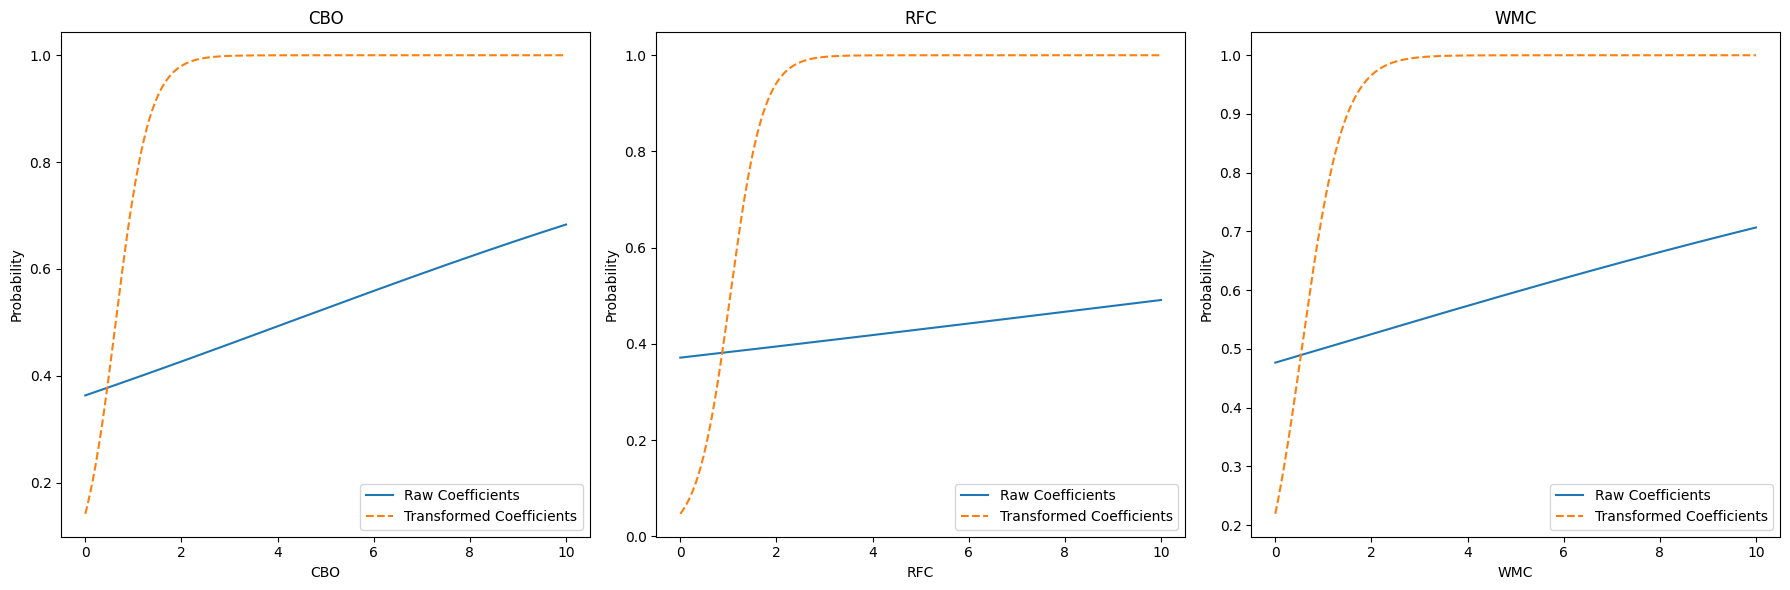

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Logistic function
def logistic_function(x, A, B):
    return 1 / (1 + np.exp(-(A + B * x)))

# Coefficients for raw values
coefficients_raw = {
    'CBO': {'A': -0.5604, 'B': 0.1329},
    'RFC': {'A': -0.5257, 'B': 0.0491},
    'WMC': {'A': -0.0935, 'B': 0.0973}
}

# Coefficients for transformed values
coefficients_transformed = {
    'CBO': {'A': -1.80, 'B': 2.8487},
    'RFC': {'A': -3.01, 'B': 2.90},
    'WMC': {'A': -1.27, 'B': 2.31}
}

# Range of x values to plot
x_values = np.linspace(0, 10, 500)

# Create subplots
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

# Plot logistic regression curves for CBO
y_raw = logistic_function(x_values, coefficients_raw['CBO']['A'], coefficients_raw['CBO']['B'])
y_transformed = logistic_function(x_values, coefficients_transformed['CBO']['A'], coefficients_transformed['CBO']['B'])
ax[0].plot(x_values, y_raw, label='Raw Coefficients')
ax[0].plot(x_values, y_transformed, label='Transformed Coefficients', linestyle='dashed')
ax[0].set_title('CBO')
ax[0].set_xlabel('CBO')
ax[0].set_ylabel('Probability')
ax[0].legend()

# Plot logistic regression curves for RFC
y_raw = logistic_function(x_values, coefficients_raw['RFC']['A'], coefficients_raw['RFC']['B'])
y_transformed = logistic_function(x_values, coefficients_transformed['RFC']['A'], coefficients_transformed['RFC']['B'])
ax[1].plot(x_values, y_raw, label='Raw Coefficients')
ax[1].plot(x_values, y_transformed, label='Transformed Coefficients', linestyle='dashed')
ax[1].set_title('RFC')
ax[1].set_xlabel('RFC')
ax[1].set_ylabel('Probability')
ax[1].legend()

# Plot logistic regression curves for WMC
y_raw = logistic_function(x_values, coefficients_raw['WMC']['A'], coefficients_raw['WMC']['B'])
y_transformed = logistic_function(x_values, coefficients_transformed['WMC']['A'], coefficients_transformed['WMC']['B'])
ax[2].plot(x_values, y_raw, label='Raw Coefficients')
ax[2].plot(x_values, y_transformed, label='Transformed Coefficients', linestyle='dashed')
ax[2].set_title('WMC')
ax[2].set_xlabel('WMC')
ax[2].set_ylabel('Probability')
ax[2].legend()

plt.tight_layout()
plt.show()

In [12]:
import numpy as np

# -2LogL values for the models
logL_values_raw = {
    'CBO': 2074.5551447584066,  # CBO raw
    'RFC': 2074.5551447584066,  # RFC raw
    'WMC': 2074.5551447584066   # WMC raw
}

logL_values_transformed = {
    'CBO': 2074.5551447584066,  # CBO transformed
    'RFC': 2074.5551447584066,  # RFC transformed
    'WMC': 2074.5551447584066  # WMC transformed
}

# Logistic regression coefficients
coefficients_raw = {
    'CBO': {'A': -0.5604, 'B': 0.1329},
    'RFC': {'A': -0.5257, 'B': 0.0491},
    'WMC': {'A': -0.0935, 'B': 0.0973}
}

coefficients_transformed = {
    'CBO': {'A': -1.80, 'B': 2.8487},
    'RFC': {'A': -3.01, 'B': 2.90},
    'WMC': {'A': -1.27, 'B': 2.31}
}

# Critical value for chi-square distribution with 1 degree of freedom at significance level 0.05
critical_value = 3.8

# Function to check significance
def check_significance(logL_value, critical_value=3.8):
    return logL_value > critical_value

# Check significance for raw and transformed logL values
significance_raw = {var: check_significance(logL) for var, logL in logL_values_raw.items()}
significance_transformed = {var: check_significance(logL) for var, logL in logL_values_transformed.items()}

# Summary of logistic regression coefficients and significance
summary = lambda var, cfg_raw, cfg_trans, sig_raw, sig_trans: f"""
Variable: {var}
  Raw:
    - Intercept (A): {cfg_raw['A']}
    - Coefficient (B): {cfg_raw['B']}
    - -2LogL: {logL_values_raw[var]}
    - Significant: {'Yes' if sig_raw else 'No'}

  Transformed:
    - Intercept (A): {cfg_trans['A']}
    - Coefficient (B): {cfg_trans['B']}
    - -2LogL: {logL_values_transformed[var]}
    - Significant: {'Yes' if sig_trans else 'No'}
"""

quantified_results = [
    summary(var, coefficients_raw[var], coefficients_transformed[var], significance_raw[var], significance_transformed[var])
    for var in ['CBO', 'RFC', 'WMC']
]

print("\n".join(quantified_results))


Variable: CBO
  Raw:
    - Intercept (A): -0.5604
    - Coefficient (B): 0.1329
    - -2LogL: 2074.5551447584066
    - Significant: Yes

  Transformed:
    - Intercept (A): -1.8
    - Coefficient (B): 2.8487
    - -2LogL: 2074.5551447584066
    - Significant: Yes


Variable: RFC
  Raw:
    - Intercept (A): -0.5257
    - Coefficient (B): 0.0491
    - -2LogL: 2074.5551447584066
    - Significant: Yes

  Transformed:
    - Intercept (A): -3.01
    - Coefficient (B): 2.9
    - -2LogL: 2074.5551447584066
    - Significant: Yes


Variable: WMC
  Raw:
    - Intercept (A): -0.0935
    - Coefficient (B): 0.0973
    - -2LogL: 2074.5551447584066
    - Significant: Yes

  Transformed:
    - Intercept (A): -1.27
    - Coefficient (B): 2.31
    - -2LogL: 2074.5551447584066
    - Significant: Yes



In [18]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from scipy.stats import binned_statistic

# Assuming your dataset is already loaded and transformed in `df`

# Calculate the Hosmer-Lemeshow test statistic
def hosmer_lemeshow_test(y_true, y_pred, g=10):
    bin_edges = np.linspace(0, 1, g + 1)
    bin_labels = np.digitize(y_pred, bin_edges, right=True)

    observed_freq = np.array([(y_true[bin_labels == i].sum(), (y_true[bin_labels == i] == 0).sum()) for i in range(1, g + 1)]).T
    expected_probs = np.array([(y_pred[bin_labels == i].mean(), 1 - y_pred[bin_labels == i].mean()) for i in range(1, g + 1)]).T
    expected_freq = expected_probs * observed_freq.sum(axis=0, keepdims=True)

    hl_stat = np.sum((observed_freq - expected_freq) ** 2 / expected_freq)
    return hl_stat

# Dummy target variable for logistic regression (assume binary target; replace as needed)
df['target'] = np.random.randint(0, 2, size=len(df))

# Logistic regression model function
def logistic_regression(dependent_var, independent_var):
    X = sm.add_constant(df[independent_var])  # Add constant term
    y = df[dependent_var]
    model = sm.Logit(y, X).fit(disp=False)
    return model

# List of metrics to evaluate
metrics = ['CBO', 'RFC', 'WMC']

# HL values for raw and transformed models
hl_values_raw = {}
hl_values_transformed = {}

for metric in metrics:
    # Raw model
    model_raw = logistic_regression('target', metric)
    y_pred_raw = model_raw.predict(sm.add_constant(df[metric]))
    hl_values_raw[metric] = hosmer_lemeshow_test(df['target'], y_pred_raw)

    # Transformed model
    model_transformed = logistic_regression('target', f'Transformed_{metric}')
    y_pred_transformed = model_transformed.predict(sm.add_constant(df[f'Transformed_{metric}']))
    hl_values_transformed[metric] = hosmer_lemeshow_test(df['target'], y_pred_transformed)

# Print HL test results
print("\nHosmer-Lemeshow Test Results (HL < 16 is Desirable):")
print("\nRaw Values:")
for metric, hl in hl_values_raw.items():
    print(f"{metric}: HL = {hl:.2f} -> {'Good Fit' if hl < 16 else 'Poor Fit'}")

print("\nTransformed Values:")
for metric, hl in hl_values_transformed.items():
    print(f"{metric}: HL = {hl:.2f} -> {'Good Fit' if hl < 16 else 'Poor Fit'}")


Hosmer-Lemeshow Test Results (HL < 16 is Desirable):

Raw Values:
CBO: HL = nan -> Poor Fit
RFC: HL = nan -> Poor Fit
WMC: HL = nan -> Poor Fit

Transformed Values:
CBO: HL = nan -> Poor Fit
RFC: HL = nan -> Poor Fit
WMC: HL = nan -> Poor Fit


In [19]:
from scipy.stats import norm

# Define the cludes for Hubert's statistics:
def calculate_hubert_statistics(true_labels, pred_probs, threshold=0.5):
    # Convert probabilities to binary classes based on the threshold
    pred_labels = (pred_probs >= threshold).astype(int)

    # Define MF and LF
    N_MF = np.sum(true_labels)
    N_LF = len(true_labels) - N_MF
    N_MF_pred = np.sum(pred_labels)
    N_LF_pred = len(pred_labels) - N_MF_pred

    # Calculate expected number of correct classifications due to chance
    e = (N_MF * N_MF_pred + N_LF * N_LF_pred) / len(true_labels)

    # Calculate the observed number of correct classifications
    O = np.sum(true_labels == pred_labels)

    # Calculate Z statistic
    Z = (O - e) / np.sqrt(e * (1 - (e / len(true_labels))))

    return O, e, Z

# Apply the discrimination test for both raw and transformed models
discrimination_results = {'raw': {}, 'transformed': {}}
metrics = {'CBO': 'CBO', 'RFC': 'RFC', 'WMC': 'WMC'}

for form in ['raw', 'transformed']:
    for metric in metrics.keys():
        if form == 'raw':
            y_probs = logistic_regression('target', metric).predict(sm.add_constant(df[metric]))
        else:
            y_probs = logistic_regression('target', f'Transformed_{metric}').predict(sm.add_constant(df[f'Transformed_{metric}']))

        # Perform discrimination analysis using Hubert's test
        O, e, Z = calculate_hubert_statistics(df['target'], y_probs)

        # Check if Z is significant at alpha = 0.05
        p_value = 2 * (1 - norm.cdf(abs(Z)))  # Two-tailed test
        significant = p_value < 0.05

        discrimination_results[form][metric] = {
            'O': O,
            'e': e,
            'Z': Z,
            'p_value': p_value,
            'significant': significant
        }

# Print results for discrimination
print("\nDiscrimination Results (raw):")
for metric, results in discrimination_results['raw'].items():
    print(f"{metric}: O = {results['O']}, e = {results['e']:.2f}, Z = {results['Z']:.2f}, p-value = {results['p_value']:.2f}, Significant = {results['significant']}")

print("\nDiscrimination Results (transformed):")
for metric, results in discrimination_results['transformed'].items():
    print(f"{metric}: O = {results['O']}, e = {results['e']:.2f}, Z = {results['Z']:.2f}, p-value = {results['p_value']:.2f}, Significant = {results['significant']}")


Discrimination Results (raw):
CBO: O = 770, e = 770.00, Z = 0.00, p-value = 1.00, Significant = False
RFC: O = 770, e = 770.00, Z = 0.00, p-value = 1.00, Significant = False
WMC: O = 770, e = 770.00, Z = 0.00, p-value = 1.00, Significant = False

Discrimination Results (transformed):
CBO: O = 770, e = 770.00, Z = 0.00, p-value = 1.00, Significant = False
RFC: O = 770, e = 770.00, Z = 0.00, p-value = 1.00, Significant = False
WMC: O = 770, e = 770.00, Z = 0.00, p-value = 1.00, Significant = False
